In [1]:
import numpy as np
import matplotlib.pyplot as plt





# **1   Problem: The 1D Ising model**


Consider a one-dimensional Ising model with $L$ spins. Each spin can take a value $\sigma$ ∈ {−1,+1} and interacts only with its two nearest neighbours. The Hamiltonian of this system, speciﬁed by a coupling energy constant $J$ and an external magnetic ﬁeld h, reads:



$$H(\vec\sigma) = -\sum_{x=1}^{L} \sigma_{x} \left[\frac{J}{2}(\sigma_{x+1} +\sigma_{x-1})+ h\right] $$

in which we impose periodic boundary conditions, i.e. $L + x = x$.

# **2 Programming part**



*  Write a function that takes as arguments an array of $L$ spins, $ \vec\sigma = \{\sigma_1,...,\sigma_L \}$, the coupling constant $J$, and the magnetic ﬁeld $h$, and returns the energy of that conﬁguration $\vec\sigma$ (be careful about the boundary condition). 


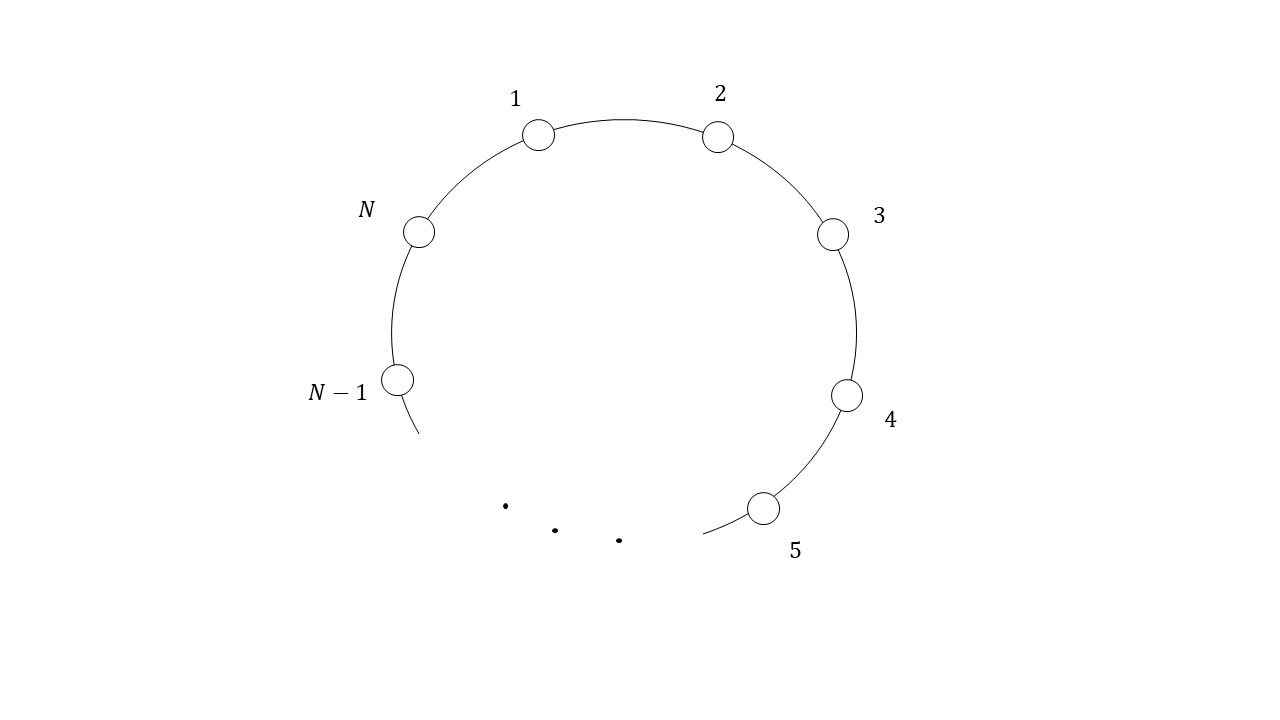

***Solution***



In [2]:
def Energy(arrayL, J, h):
  H = 0
  for x in range(len(arrayL)):
    
    #Being careful about the boundary condition
    if x==0:
        H = - arrayL[x]*(J*(arrayL[x+1]+ arrayL[-1])/2+ h) + H

    elif x + 1 >=  len(arrayL):
        x = len(arrayL) -1
        H = - arrayL[x]*(J*(arrayL[0]+ arrayL[x-1])/2 + h) + H
    
    else:
        H = - arrayL[x]*(J*(arrayL[x+1]+ arrayL[x-1])/2+ h) + H
  return H

#An example to proof if it is working
h=0.2
J=1
arrayL = np.array([1,-1,-1])
E= Energy(arrayL, J, h)
print(E)

1.2




*   Write a function that compute the absolute value of the magnetization of the sequence $\vec\sigma$ (normalized between 0 and 1). 

***Solution***



The magnetization is given by

$M(\vec\sigma) = \frac{1}{L} \sum_{x=1}^{L}\sigma_x $



In [3]:
def absValueofM(arrayL):
  M = -arrayL.sum()/len(arrayL)
  if M < 0:
    return -M 
  else:
    return M

#With the arrayL given above:
j= absValueofM(arrayL)
print(j)

0.3333333333333333




*   Check that for a sequence of aligned spins and $h = 0$, the ﬁrst function that you wrote returns the energy $−J∗L$, while the second one a magnetization of 1. 

***Solution***




In [4]:
#check
J= 1
h=0
# With all the spins aligned
arrayL = np.array([1,1,1,1,1,1])   #L = 6

E= Energy(arrayL, J, h)
# E Must print -6
print(E)

M = absValueofM(arrayL)
# M Must print 1
print(M)

-6.0
1.0



*   Check that for a sequence of randomly generated spins and $h = 0$, the energy 



is distributed around zero.

***Solution***

(array([  10.,   81.,  473., 1479., 2719., 3149., 1498.,  498.,   86.,
           7.]),
 array([-124. ,  -99.2,  -74.4,  -49.6,  -24.8,    0. ,   24.8,   49.6,
          74.4,   99.2,  124. ]),
 <a list of 10 Patch objects>)

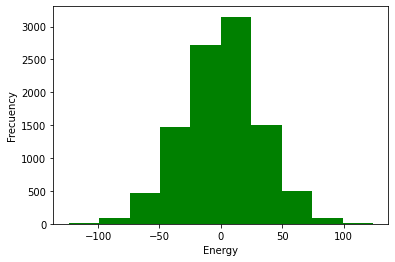

In [ ]:
h=0
L= 1000
E=np.array([])

#Taken several values of the function Energy (The hamiltonian)
for i in range(10000):
  E = np.append(E, Energy(np.random.randint(0,2,L)*2-1, J, h))
 
plt.xlabel('Energy')
plt.ylabel('Frecuency')

#Histogram
plt.hist(E, color='g')

# **2.1 Metropolis Markov chain**

To generate samples from the canonical probability distribution over the microstates $\vec\sigma$ you will write the basic Metropolis algorithm. The ﬁrst step is to generate a transition between two conﬁgurations. The Metropolis algorithm prescribes that, given $\vec\sigma$, you ﬂip a spin, say  $\bar x$, generating a candidate conﬁguration $\sigma'$ , where $\vec\sigma'_{\bar x}= -\sigma_{\bar x}$. Then the energy diﬀerence between the two conﬁguration is computed, let us call it $\Delta E = H(\vec\sigma') −H(\vec\sigma)$. If $\Delta E \leq 0$, accept the new candidate, if not, accept the candidate only with probability $p = exp[−\beta \Delta E]$



*   First, write a formula to compute $\Delta E$ and test it. Check that, given $\sigma = (−1,1,1), \sigma' = (1,1,1), J = 1, h = 0.1$, you must obtain $\Delta E = −4.2$. 

***Solution***



In [5]:
#Function of difference of energy
def Delta_of_Energy(prime, without_prime, J, h):
  E1 = Energy(prime, J, h) 
  E2 = Energy(without_prime, J, h)
  return E1 - E2

#An example
array_prime =  np.array([1 , 1, 1]) 
array_without_prime = np.array([-1, 1, 1])
J= 1
h= 0.1
Delta_E= Delta_of_Energy(array_prime, array_without_prime, J, h)
print(Delta_E)

-4.2


 * Write a function that takes as arguments a conﬁguration, $\vec\sigma$, the coupling constant $J$, and the magnetic ﬁeld $h$, the inverse temperature $\beta$, and returns a new conﬁguration according to the Metropolis prescription.

***Solution***

 

In [6]:
def Metropolis_prescription(array_sigma,J, h, beta):

  l = len(array_sigma)
  
  # Choosing the spin to flip (the position in the array_sigma)
  m = np.random.randint(0,l)

  # The energy difference
  new_E = array_sigma[(m-1)%l] + array_sigma[(m+1)%l]
  delta_E =2*array_sigma[m]*(J*new_E + h)   #I didn't use the function Delta_of_Energy here because the program became very ineficient, it lasted to much time when the len(array_sigma) was large.

  

  # Accepting or rejecting the flipped spin according to the Metropolis rule
  u = np.random.rand()     # Generating a random number betwen 0 and 1
  p = np.exp(-beta*delta_E)  # With probability p

  if delta_E <= 0 or u < p:
    array_sigma[m] *= -1

  return array_sigma

beta = 1
J=1
h=0
array_prime = np.array([1,-1,1])

metropolis = Metropolis_prescription(array_prime,J, h, beta)
print(metropolis)



[-1 -1  1]


* Iterate the function above for some steps starting from a random initial conﬁguration of $L = 200$ spins. Check that, choosing a small temperature $\beta = 10$, and a small magnetic ﬁeld $h = 0.1$, you end up in a conﬁguration where all the spins are aligned to 1 after enough iterations.

***Solution***


In [ ]:
h = 0.1
J= 2
beta = 10
L= 200
sigma = np.array([])

sigma = np.random.randint(0,2,L)*2-1  #random initial configuration

for i in range(100000):
  sigma = Metropolis_prescription(sigma,J, h, beta)

# sigma must print a vector of length 200 of only ones
print(sigma)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## **2.2 Generating samples and computing the magnetization**

You know that the Markov chain of states obtained through iteration of the previous function does not generate reliable samples. Indeed, you need to equilibrate the chain and also discard a lot of samples to remove correlation. By using properly generated samples, you can compute the average absolute magnetization over them: $\left<M\right>= \frac{1}{N} \sum_{\vec\sigma} |M(\vec\sigma)|$, where $ M(\vec\sigma) =\sum_{j} \sigma_j/L$ 

* Write a function that generates reliable samples with the Metropolis algorithm. The function takes as argument the length of the chain $L$, the inverse temperature $\beta$, the coupling constant $J$, the magnetic ﬁeld $h$, the equilibration time $t_e$, the correlation time $t_c$ and the number of samples $N$. It returns the list/array of the $N$ generated good samples. Remember to discard the samples for the equilibration and for the removal of correlations. Each time you get a new good sample add it to a list. Be careful that when you append it you should shallow-copy it (see https://docs.python.org/3/library/copy.html). 

***Solution***



In [7]:
from copy import copy

#The metropolis ising algorithm created to generates reliable samples
def metropolis_ising_1D(L, beta, J, h, t_e, t_c, N_samples):
  
  generated_samples = 0
  state_All_states = np.array([])
  state = np.random.randint(0,2,L)*2-1 # First state generated at random

  # Equilibration
  for i in range(t_e):
    state = Metropolis_prescription(state, J, h,beta)

  generated_samples += 1

  while generated_samples <= N_samples:

    # Discarting correlated samples
    for i in range(t_c):
      state = Metropolis_prescription(state, J, h, beta)

    state_All_states = np.append(state_All_states, copy(state)) #If I do a shallow-copy, modifications in the object 'state' won't affect the new object 'state_All_states'
    generated_samples += 1

  #This function must return an array N_samples x L
  return state_All_states.reshape((N_samples, L))

In [8]:
#Magnetization 

def average_magnetization(state):
  magnet = np.array([])
  for i in range(len(state)):
    magnet = np.append(magnet, absValueofM(state[i]))

  #This must return the average absolute magnetization
  return magnet.mean()

* Check that the average absolute magnetization computed over the samples generated with the previous function is close to 1 for $h = 0.1$ and $\beta = 3$ (use also $L = 200$, $t_e = 30000$, $t_c = 5000$, $N$ as large as you can). Check also that it is close to zero for $\beta = 0.1$. 

***Solution***

In [ ]:
L=200
J=1
h=0.1
t_e= 30000
t_c= 5000
N_samples = 100

## **Close to 1 with $\beta= 3$**

In [ ]:
beta1 = 3

state1 = metropolis_ising_1D(L ,beta1, J , h, t_e, t_c, N_samples)
average_M1 = average_magnetization(state1) 

#Must print a value close to 1
print(average_M1)

1.0


## **Close to 0 with $\beta= 0.1$**

In [ ]:
beta2 = 0.1

state2 = metropolis_ising_1D(L ,beta2, J , h, t_e, t_c, N_samples)
average_M2 = average_magnetization(state2) 

#Must print a value close to 0
print(average_M2)

0.061099999999999995


* Using the function above, plot the average absolute magnetization as a function of diﬀerent temperatures.



***Solution***

0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75
7.0
7.25
7.5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


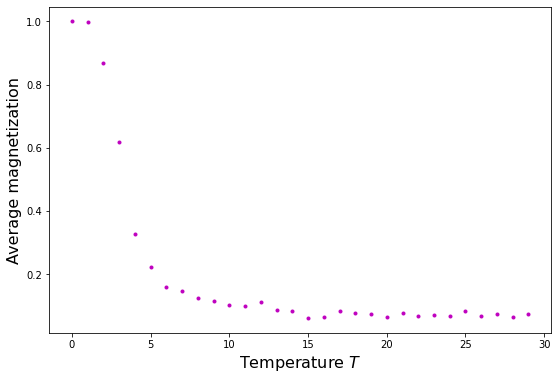

In [ ]:
#Plot of the absolute magnetization as a function the temperatures
p = np.array([])
for T in range(30):
  T = (T+1)/4
  print(T)
  state = metropolis_ising_1D(200,1/T, 1 , 0.1, 30000, 5000, 40)
  average_M = average_magnetization(state)
  p= np.append(p, average_M)

# Decreasing the temperature the average magnetization increases because the configurations are near the lowest-energy configuration, which is the one where all the spins are positive or all the spins are negative.
# Increasing the temperature, the system will occupy more possible configurations, and the most probable one is the one conformed of spins positive and negative, so the average magnetization decreases.
Temperature = np.arange(0,30, 1)
print(Temperature)
plt.figure(figsize=(9,6))
plt.xlabel('Temperature $T$',fontsize=16)
plt.ylabel('Average magnetization',fontsize=16)
plt.plot(Temperature,p[Temperature],'.',linewidth=2,color='m')

* Use the function for generating samples of the Ising model to give a numerical answer to the questions of the theoretical part.


# **3 Theoretical questions**

Consider the case of the above system with $L = 3$, $h = 0.2$, and $J = 1$.


**1.**    What are the probabilities $P_2(1)$ and $P_2(−1)$ that $\sigma_2 = 1$ and $\sigma_2 = −1$, respectively, if the system’s temperature is ﬁxed at $T = 2/k_B$?

***Solution***

All the possible configurations are

$$\vec\sigma^{1} = (1,1,1) ~~~\vec\sigma^{2} = (-1,1,1) ~~~\vec\sigma^{3} = (1,1,-1) ~~~\vec\sigma^{4} = (-1,1,-1)$$
$$\vec\sigma^{5} = (-1,-1,1) ~~~\vec\sigma^{6} = (1,-1,-1) ~~~\vec\sigma^{7} = (1,-1,1) ~~~\vec\sigma^{8} = (-1,-1,-1)$$



The probability of a configuration is then given by the **Boltzmann distribution** 

$$P(\vec\sigma) = \frac{e^{-\beta H(\vec\sigma)}}{Z}$$

* $\sigma_2 = 1$. The possible configurations are 

$$\vec\sigma^{1} = (1,1,1) ~~~\vec\sigma^{2} = (-1,1,1) ~~~\vec\sigma^{3} = (1,1,-1) ~~~\vec\sigma^{4} = (-1,1,-1)$$

So, the probability we are looking for is

$$P(\sigma_2=1)= \frac{e^{-\beta H(\vec\sigma^{1})}+e^{-\beta H(\vec\sigma^{2})}+e^{-\beta H(\vec\sigma^{3})}+e^{-\beta H(\vec\sigma^{4})}}{Z}$$

Where $H$ is the hamiltonian given by
$$H(\vec\sigma) = -\sum_{x=1}^{3} \sigma_{x} \left[\frac{J}{2}(\sigma_{x+1} +\sigma_{x-1})+ h\right] $$

And $Z$ is the partition function for the system

$$Z = \sum_{i=1}^8 e^{-\beta H(\vec\sigma^{i})} =  e^{-\beta H(\vec\sigma^{1})}+ e^{-\beta H(\vec\sigma^{2})}+ e^{-\beta H(\vec\sigma^{3})}+e^{-\beta H(\vec\sigma^{4})}+e^{-\beta H(\vec\sigma^{5})}+e^{-\beta H(\vec\sigma^{6})}+e^{-\beta H(\vec\sigma^{7}) + e^{-\beta H(\vec\sigma^{8})}}$$


Then, every hamiltonian can be calculated as

$$H(\vec\sigma^{i}) = - \sigma_{1}^{i} \left[\frac{J}{2}(\sigma_{2}^{i} +\sigma_{3}^{i})+ h\right]- \sigma_{2}^{i} \left[\frac{J}{2}(\sigma_{3}^{i} +\sigma_{1}^{i})+ h\right] - \sigma_{3}^{i} \left[\frac{J}{2}(\sigma_{1}^{i} +\sigma_{2}^{i})+ h\right]$$


Let's do it for only $\vec\sigma^{2}= (-1, 1, 1)$, then the others can be calculated as the same way. Here $\sigma_1^{2}=-1$, $\sigma_2^{2}=1$, $\sigma_1^{2}=1$ \\


$$H(\vec\sigma^{2})= H(\sigma_1^{2},\sigma_2^{2},\sigma_3^{2}) = H(\sigma_1^{2}) + H(\sigma_2^{2}) + H(\sigma_3^{2})$$

Where 

$$H(\sigma_1^{2}) = - \sigma_{1}^{2} \left[\frac{J}{2}(\sigma_{2}^{2} +\sigma_{3}^{2})+ h\right] = J+ h$$
$$H(\sigma_2^{2}) = - \sigma_{2}^{2} \left[\frac{J}{2}(\sigma_{3}^{2} +\sigma_{1}^{2})+ h\right] = -h$$
$$H(\sigma_3^{2}) = - \sigma_{3}^{2} \left[\frac{J}{2}(\sigma_{1}^{2} +\sigma_{2}^{2})+ h\right] = -h$$

So,

$$ H(\vec\sigma^{2}) = J - h$$

and

$$H(\vec\sigma^{1})= -3(J + h), ~~~ H(\vec\sigma^{3})= J-h, ~~~ H(\vec\sigma^{4})= J+ h, ~~~ H(\vec\sigma^{5})= J+h , ~~~ $$

$$H(\vec\sigma^{6})= J + h, ~~~ H(\vec\sigma^{7})= J - h, ~~~ H(\vec\sigma^{8})= -3(J - h)$$

So, the partition function

$$Z =  e^{3\beta (J - h)}+ 3e^{-\beta (J - h)}+ 3e^{-\beta (J + h)} + e^{3\beta (J + h)} $$

finally, the probability $P(\sigma_2)$ is 

$$P(\sigma_2= 1)= \frac{e^{3\beta (J+h)}+2e^{-\beta (J-h)}+e^{-\beta (J+h)}}{ e^{3\beta (J - h)}+ 3e^{-\beta (J - h)}+ 3e^{-\beta (J + h)} + e^{3\beta (J + h)}}$$


* Now for $\sigma_2 = -1$, the possible configurations are

$$\vec\sigma^{5} = (-1,-1,1) ~~~\vec\sigma^{6} = (1,-1,-1) ~~~\vec\sigma^{7} = (1,-1,1) ~~~\vec\sigma^{8} = (-1,-1,-1)$$

So, the probability is

$$P(\sigma_2=-1)= \frac{e^{-\beta H(\vec\sigma^{5})}+e^{-\beta H(\vec\sigma^{6})}+e^{-\beta H(\vec\sigma^{7})}+e^{-\beta H(\vec\sigma^{8})}}{Z}$$

With $Z$ the same as calcutaled before, so

$$P(\sigma_2= -1)= \frac{e^{3\beta (J-h)}+2e^{-\beta (J+h)}+e^{-\beta (J-h)}}{ e^{3\beta (J - h)}+ 3e^{-\beta (J - h)}+ 3e^{-\beta (J + h)} + e^{3\beta (J + h)}}$$

for $h = 0.2$, and $J = 1$, $\beta = 0.5$ we get

The partition function
$$Z = e^{3\beta (J - h)}+ 3e^{-\beta (J - h)}+ 3e^{-\beta (J + h)} + e^{3\beta (J + h)}= 3.32 + 2.01 + 1.64 + 6.04 = 13.02$$
And the probabilities
 $$P(\sigma_2 = 1) = \frac{7.88}{13.02} = 0.61$$
 $$P(\sigma_2 = -1) =\frac{4.99}{13.02} = 0.384$$







**2.**   What is the probability $P_M(3)$ that the system’s total magnetization $M = 3$ at the temperature $T = 2/k_B$?



***Solution***

For a magnetization of $M = 3$, each spin has a magnetization of $m=M/L = 1$, that implies that all the spins are alined. So, for all the possible configurations of spins that we have, $\sigma_1 = (1,1,1)$ leaves us with a magnetization of $m=1$ for spin, due to the fact that $m$ for spin is defined as $ m(\vec\sigma) =\sum_{j} \sigma_j/L$, so the total magnetization is $M= mL = 3$ . Then the probability would be

$$P_{M}(3)= P(\vec\sigma^{1}) = \frac{e^{-\beta H(\vec\sigma^1)}}{Z}$$

So, at temperature $T = 2/k_B~~ \rightarrow ~~ \beta = 0.5$ and $L= 3$, $J= 1$ and $h=0.2$

$$P_{M}(3)= P(\vec\sigma^{1}) = \frac{6.05}{13.02} = 0.46 $$


 **3.** Check your results using your python simulations.

 ***Solution***


## **FIRST PROOF**

In [ ]:
#Exponetial function 

def exponential(arrayL, beta, J, h):
  return np.exp(- beta * Energy(arrayL, J, h))

In [ ]:
#Partition function and possible states

from itertools import product

def partition_function_and_states(L, beta, J, h):
  Z = 0
  all_state =np.array([])
  for i in product([-1,1], repeat=L):
    state = np.array(i)
    Z += exponential(state, beta, J, h)
    all_state = np.append(all_state, state)
  return Z, all_state.reshape(2**L,L)


* **The probability for $\sigma_2 = 1$, $J=1$, $h=0.2$, $\beta = 0.5$ (Temperature of $T= \frac{1}{2k_B}$)**

In [ ]:
 L=3
 beta= 0.5
 J= 1
 h=0.2
 zeta_and_states= partition_function_and_states(L, beta, J, h)

In [ ]:
p1=0 

states = zeta_and_states[1]

for i in range(len(states)):
  if states[i][1]== 1:
    p1= exponential(states[i], beta, J, h) + p1

Z = zeta_and_states[0]   #Partition function
print(Z)
probability1 = p1/(Z)
print(probability1)

13.02715943353849
0.6094267313670083


* **The probability for $\sigma_2 = -1$, $J=1$, $h=0.2$, $\beta = 0.5$ (Temperature of $T= \frac{1}{2k_B}$)**

In [ ]:
p2=0 

states = zeta_and_states[1]

for i in range(len(states)):
  if states[i][1]== -1:
    p2= exponential(states[i], beta, J, h) + p2

Z = zeta_and_states[0]   #Partition function

probability2 = p2/(Z)
print(probability2)

0.3905732686329917


* **The probability for a magnetization of $M = 3$ with $L= 3$, $\beta = 0.5$ (Temperature of $T= \frac{1}{2k_B}$), $J=1$ and $h=0.2$**

In [ ]:
zeta_and_states3= partition_function_and_states(3, 0.5, 1, 0.2)

p3=0 

states = zeta_and_states3[1]

for i in range(len(states)):
  if states[i][0] == 1 and states[i][1]==1 and states[i][2]==1:
    p3= exponential(states[i], 0.5, 1, 0.2) + p3

Z = zeta_and_states3[0]   #Partition function
probability3 = p3/Z
print(probability3)

0.4643873052507591


## **SECOND: NUMERICAL PROOF**

## Numerical stimate $P(\sigma_2) = 1$


* First we need to find the new equilibration and correlation tima in the case of L=3

In [30]:
# Equilibration time (studying the trajectory)

def magnet_average_trajectory(L, beta, J, h, max_time, N_realizations):
  
  average_traj = np.zeros(max_time)
  for i in range(N_realizations):
    traj = np.array([])
    state = np.random.randint(0,2, L)*2-1
    for t in range(max_time):
      state = Metropolis_prescription(state, J, h, beta )
      traj = np.append(traj, absValueofM(state))
    #print(traj)
    average_traj += traj / N_realizations
    #print(average_traj)
  return average_traj

[0.64533333 0.71866667 0.73466667 0.77066667 0.788      0.80266667
 0.788      0.79733333 0.812      0.812      0.82266667 0.80666667
 0.8        0.79466667 0.80666667 0.80266667 0.80933333 0.824
 0.82       0.812      0.812      0.81066667 0.808      0.80666667
 0.81333333 0.812      0.82133333 0.81866667 0.80666667 0.78266667
 0.792      0.82533333 0.80266667 0.83066667 0.80266667 0.79866667
 0.81333333 0.796      0.80266667 0.80533333 0.81466667 0.808
 0.81466667 0.82533333 0.80666667 0.82133333 0.79466667 0.80133333
 0.80266667 0.79733333]


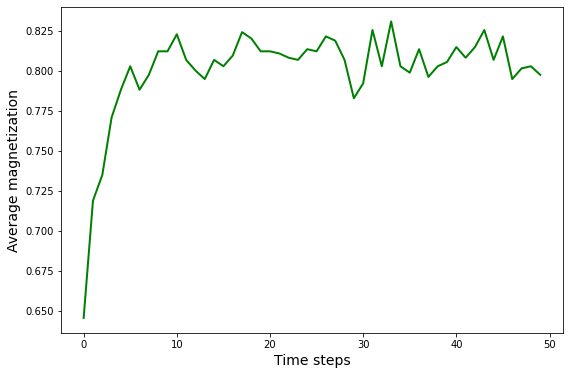

In [31]:
L = 3
J = 1
h = 0.2
beta = 0.5
max_time = 50

plot_te = magnet_average_trajectory(L, beta, J, h, 50, 500)
  
print(plot_te)
plt.figure(figsize=(9,6))
plt.xlabel('Time steps', fontsize=14)
plt.ylabel('Average magnetization', fontsize=14)

plt.plot(plot_te, linewidth=2, color='g')


In [19]:
#Correlation Time

def magnet_autocorrelation(L, beta, J, h, burn_in_time, max_corr_time, n_realizations):
 
  # Init the magnetiz product, the first and the second moments
  prod = np.zeros(max_corr_time)
  average_at_start = 0
  average_at_next = np.zeros(max_corr_time)
  sec_moment_at_start = 0
  sec_moment_at_next = np.zeros(max_corr_time)
  
  for _ in range(n_realizations):

    # Equilibration
    state = np.random.randint(0,2, L)*2-1
    for _ in range(burn_in_time):
      state = Metropolis_prescription(state, J, h, beta)

    # The start valu of the magetization is computed after the burn-in period.
    start_magnet = absValueofM(state)
    average_at_start += start_magnet / n_realizations
    sec_moment_at_start += start_magnet * start_magnet / n_realizations

    # Storing the value of all the magnetizations after the burn-in
    traj = np.array([])
    for _ in range(burn_in_time, burn_in_time + max_corr_time):
      state = Metropolis_prescription(state, J, h, beta)
      traj = np.append(traj, absValueofM(state))

    # Computing the statistical variables 
    prod += start_magnet * traj / n_realizations  
    average_at_next += traj / n_realizations
    sec_moment_at_next += traj*traj / n_realizations

  std_start = np.sqrt(sec_moment_at_start - average_at_start**2)
  std_next = np.sqrt(sec_moment_at_next - average_at_next**2)
  return (prod - average_at_next*average_at_start) / std_start / std_next

[ 0.62943874  0.2799818   0.18234211  0.08115189  0.1212089   0.07722195
  0.14056708  0.10771799  0.10771799 -0.01991258 -0.01322819 -0.01638108
 -0.02713083 -0.059173   -0.01991258 -0.00640479 -0.03366357 -0.1438851
 -0.04419621 -0.07623687 -0.01999711  0.00741927 -0.03734718 -0.04717388
  0.02571098  0.00437105 -0.03366357 -0.01997196  0.00437105 -0.02334869]


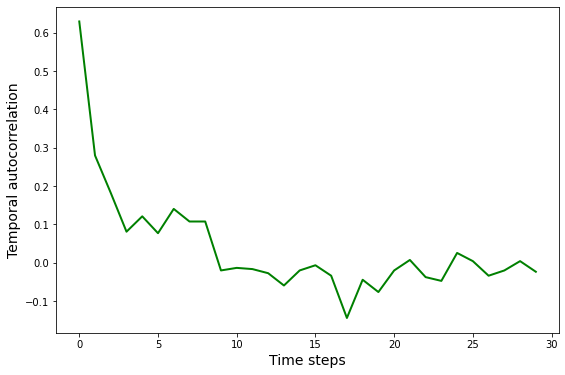

In [20]:
L = 3
J = 1
h = 0.2
beta=0.5
temperatures = [2,4]
burn_in_time = 30
max_corr_time = 10*L

Magnet_auto = magnet_autocorrelation(L, beta, J, h, burn_in_time, max_corr_time, 200)

print(Magnet_auto)
plt.figure(figsize=(9,6))
plt.xlabel('Time steps', fontsize=14)
plt.ylabel('Temporal autocorrelation', fontsize=14)

plt.plot(Magnet_auto, linewidth=2, color='g')

* Then, for the numerical demostration we have to use the fact that the probability of an event is given by

$$P(\sigma_2) = \lim_{N\rightarrow \infty} \frac{f_N}{N}$$

Where $f_N$ is the frequency of the ocurrence for the event $\sigma_2$ and $N$ is the total number of events.

To do this, the equilibration time $(t_e)$ and the correlation $(t_c)$ time will be fixed at $t_e = 30$ and $t_c= 20$ (taken from the last two graphs). Number of spins $L=3$, inverse temperature $\beta =0.5$, coupling constant $J= 1$ and magnetic field $h= 0.2$

* $P(\sigma_2 = 1)$

In [ ]:
N=90000  #Number of samples
t_e = 30
t_c = 20
L = 3
beta = 0.5
J= 1
h=0.2

sample = metropolis_ising_1D(L , beta, J , h, t_e,t_c, N)

In [ ]:
#Numerical stimate
p1=0

for j in range(N):

  if sample[j][1] == 1:
    p1 = p1 + 1

p1=p1/N

#Must print a value near 0.61
print(p1)


0.6057777777777777


* $P(\sigma_2 = -1)$

In [ ]:
#Numerical stimate 
p2=0
for i in range(N):
  
  if sample[i][1] == -1:
    p2 = p2 + 1

p2=p2/N

#Must print a value near 0.39
print(p2)

0.3942222222222222


* $P_M(3)$

In [ ]:
#Numerical stimate P_M(3)
p3=0
for i in range(len(sample)):
  if sample[i][0] == 1 and sample[i][1] == 1 and sample[i][2] == 1:
    p3 = p3 + 1

p3=p3/N

#Must print a value near 0.46
print(p3)

0.46165555555555554


**4.** In your simulations for $L = 200$, consider a subsystem formed by spins ${\sigma_1,\sigma_2,\sigma_3}$ and estimate numerically $P_2(1), P2(−1),$ and $P_M(3)$. How do these results compare with your theoretical estimates for the case of $L = 3$? Discuss your observations.


***Solution***

In [ ]:
N_number = 9000
L=200
t_e = 30000
t_c = 5000
New_system_200 = metropolis_ising_1D(L,beta, J , h, t_e, t_c, N_number)

# Must print an array N_number x L 
print(New_system_200)


[[ 1.  1. -1. ...  1.  1. -1.]
 [ 1.  1.  1. ... -1.  1. -1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1. -1.  1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]


Let's take whatever 3 subsystem from the last simulation

In [ ]:
#Taking whatever 3 spins from the system L=200
subsystem = New_system_200[:, 140:143]

print(subsystem.shape)

# Must print an array N_number x 3 
print(subsystem)


(9000, 3)
[[-1. -1. -1.]
 [ 1.  1.  1.]
 [-1. -1. -1.]
 ...
 [ 1.  1. -1.]
 [ 1.  1.  1.]
 [-1. -1.  1.]]


In [ ]:
#Error function

def Error(value_true, value_test):
  m= 100*abs(value_true - value_test)/value_true
  return m


Now let's count the frequency of ocurrence of $\sigma_2= 1$ for the last subsystem in each realization

In [ ]:
one_positive = 0

for i in range(len(subsystem)):
  if subsystem[i][1]==1:
    one_positive = one_positive + 1

one_positive = one_positive/len(subsystem)
print('Value from the simulation: {:.2f}'.format(one_positive))

#Computing the error difference between the theoretical probability and the simulation 

print('Theoretical value: {:.2f}'.format(probability1))   #Theoretical probability
error1= Error(probability1, one_positive)
print('Error in % between the theoretical and simulation is: {:.2f}%'.format(error1))


Value from the simulation: 0.63
Theoretical value: 0.61
Error in % between the theoretical and simulation is: 3.45%


the same for $\sigma = -1$

In [ ]:
one_negative = 0
for i in range(len(subsystem)):
  if subsystem[i][1]==-1:
    one_negative = one_negative + 1

one_negative = one_negative/len(subsystem)
print('Value from the simulation: {:.2f}'.format(one_negative))

#Computing the error difference between the theoretical probability and the simulation 

print('Theoretical value: {:.2f}'.format(probability2))   #Theoretical probability
error2= Error(probability2, one_negative)
print('Error in % between the theoretical and simulation {:.2f}%'.format(error2))


Value from the simulation: 0.37
Theoretical value: 0.39
Error in % between the theoretical and simulation 5.13%


now for $P_M(3)$

In [ ]:
one_magnetization = 0
for i in range(len(subsystem)):
  if subsystem[i][0] == 1 and subsystem[i][1] == 1 and subsystem[i][2] == 1:
    one_magnetization = one_magnetization + 1

one_magnetization = one_magnetization/len(subsystem)
print('Value from the simulation: {:.2f}'.format(one_magnetization))

#Computing the error difference between the theoretical probability and the simulation 

print('Theoretical value: {:.2f}'.format(probability3))   #Theoretical probability
error3= Error(probability3, one_negative)
print('Error in % between the theoretical and simulation {:.2f}%'.format(error3))


Value from the simulation: 0.41
Theoretical value: 0.46
Error in % between the theoretical and simulation 20.21%


## ***Conclusion***
For the numerical stimate in the **c** part, was found that the values of $P(\sigma_2=1)$, $P(\sigma_2=-1)$ and $P(\sigma_2=1)$ are very close to the theoretical part, but the values obtained in the part **d** are not so close.

**Note:** My problem here is that I couldn't undestand what was the purpose of considering 1 subsytem of the system L=200, so I have not clear what to conclude. My attempt to give an explanation is that maybe we are considering that subsytem to show that the hamiltonian of this subsystem is affected by its surrounding (frontier conditions), that is to say that the spins $\sigma_1$ and $\sigma_3$ are affected by their closer neighbours and that is why the difference in the theoretical and simulation values are high.

